In [2]:
import networkx as nx
%matplotlib inline

In [3]:
M=nx.read_gml("data/polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

#### CSC570R Week 13 Homework
#### Melanie Klein
#### Spring 2017

### 1.  Create a nice looking graph of the political blog network

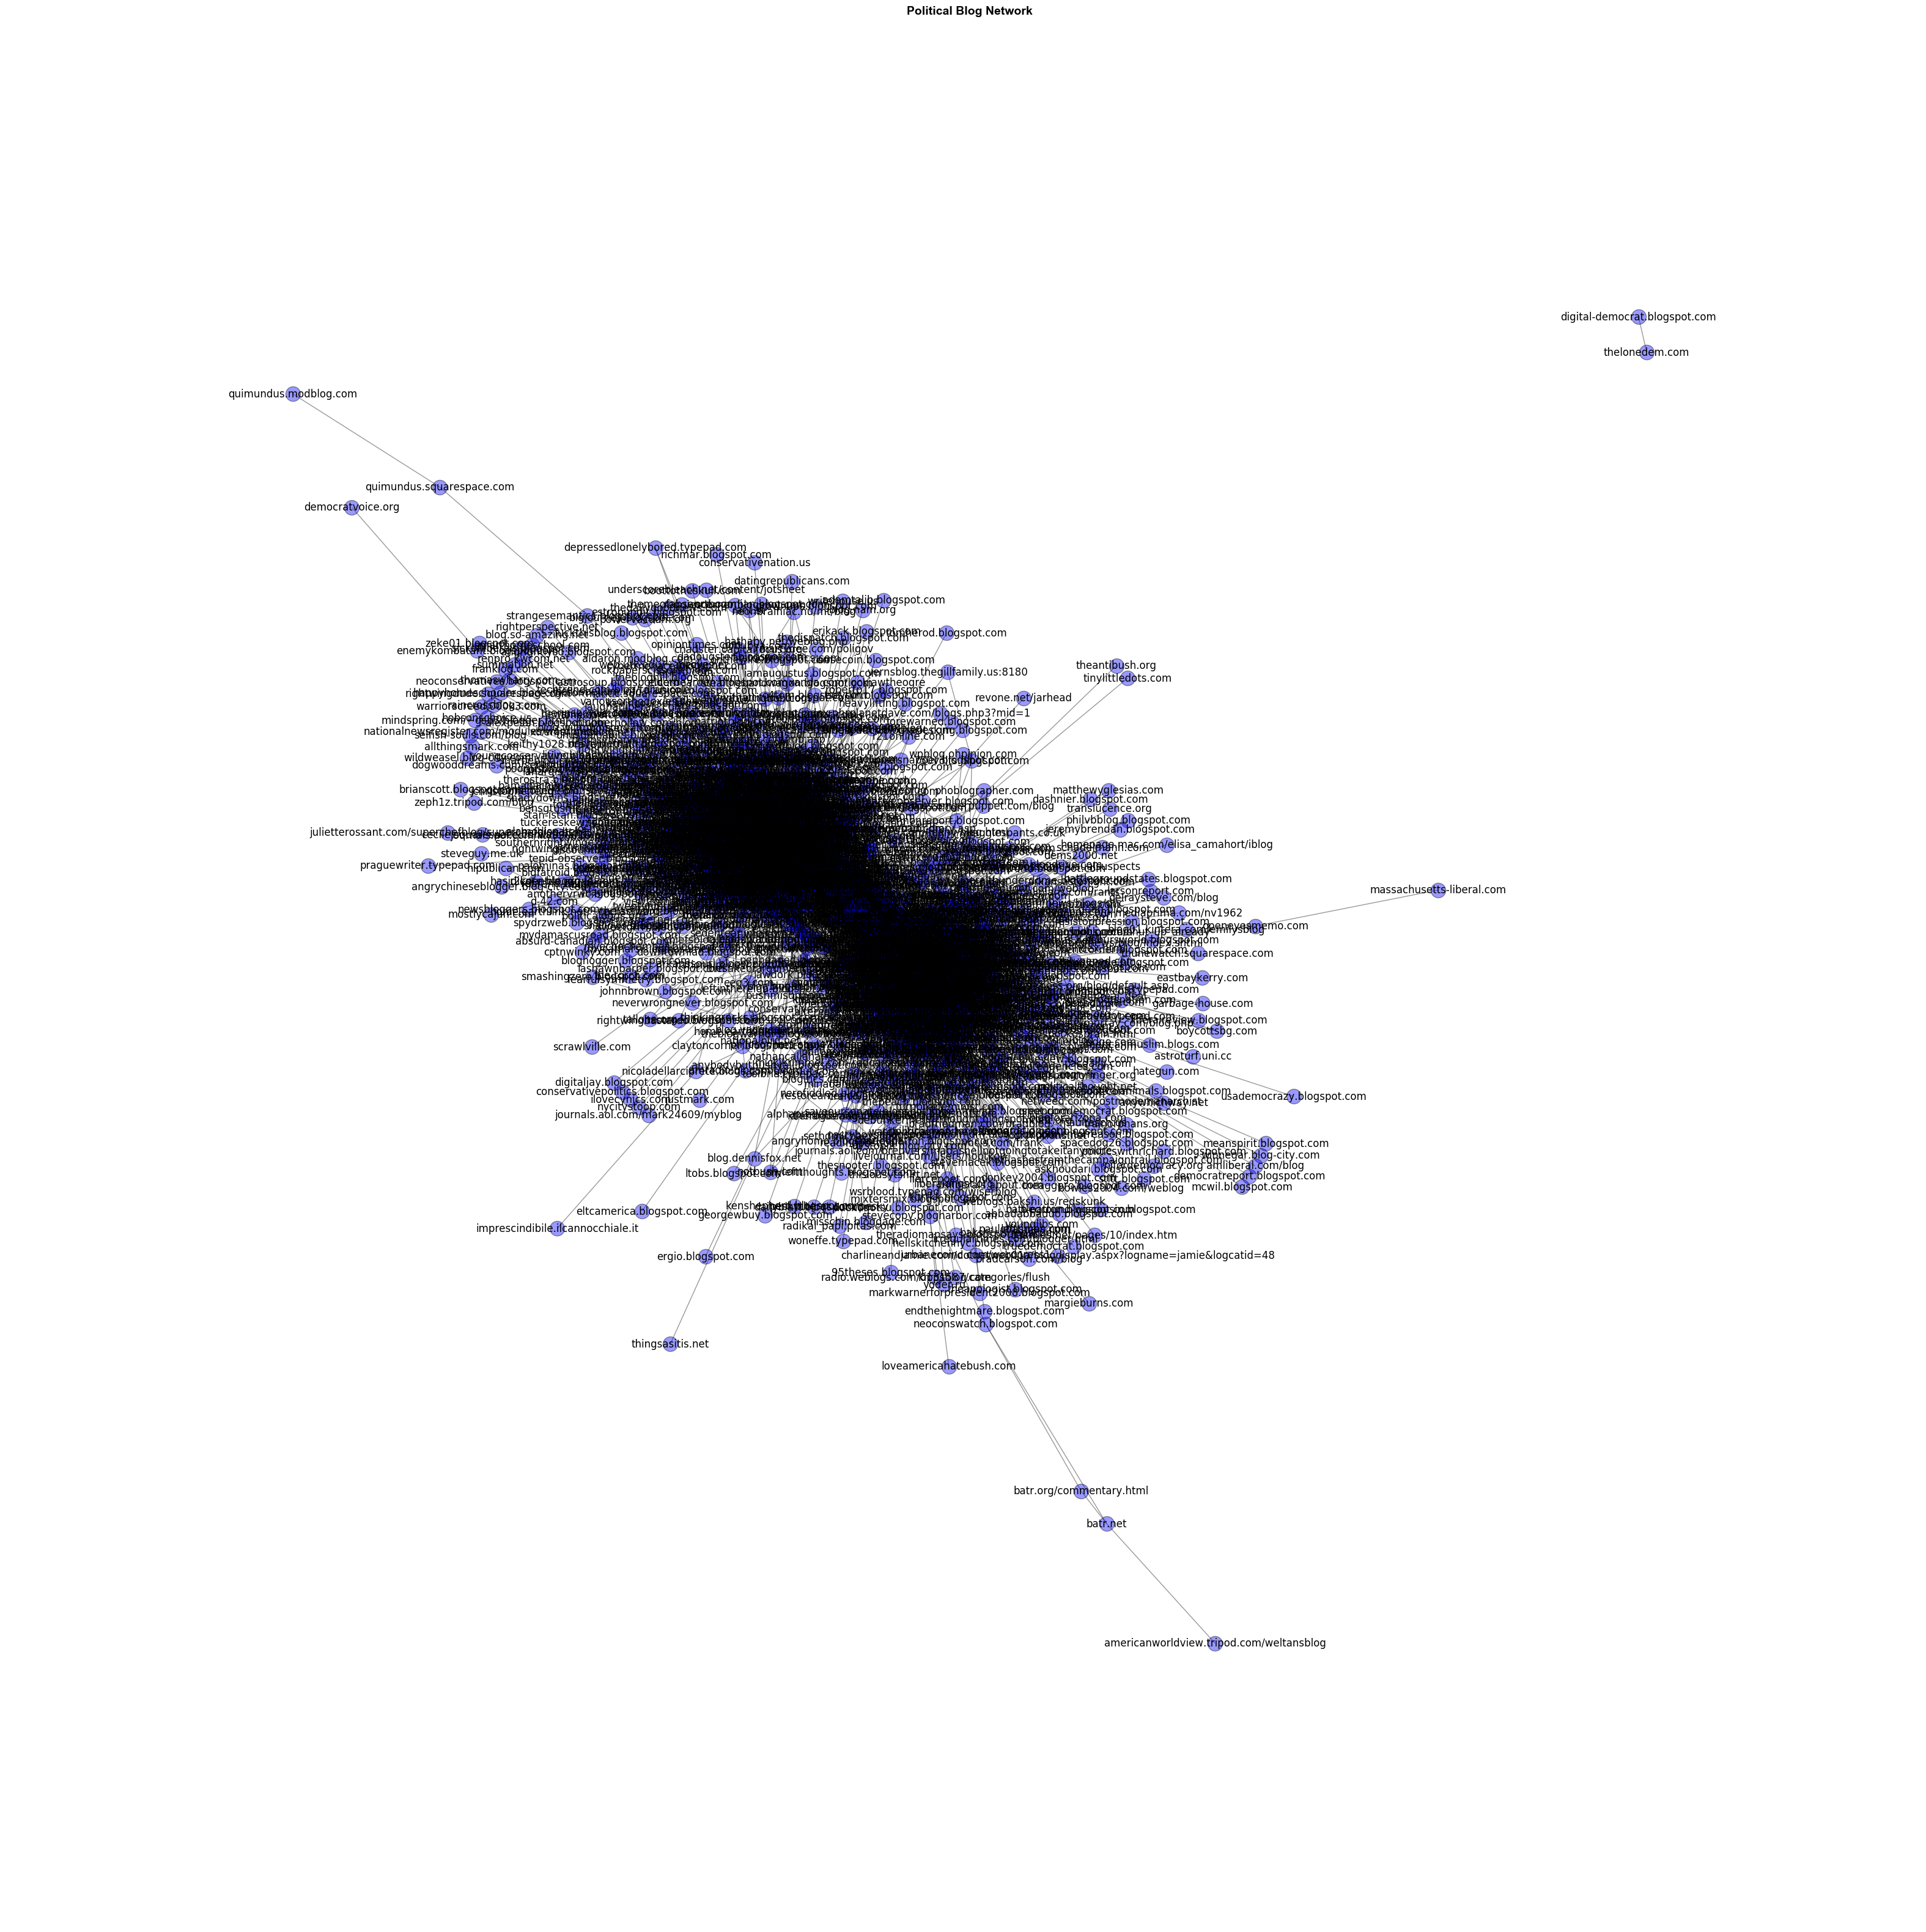

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=300, scale=5, k=.4)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Arial',
        'color'      : 'k',
        'fontweight' : 'bold',
        'fontsize'   : 14}
plt.title("Political Blog Network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [9]:
centrality=nx.eigenvector_centrality(G)

In [24]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))

In [27]:
sorted(blog_list, key=lambda x: x[1], reverse=True)[0:10]

[('atrios.blogspot.com', 0.19480797936637698),
 ('dailykos.com', 0.1608974020523483),
 ('washingtonmonthly.com', 0.14653924259836867),
 ('digbysblog.blogspot.com', 0.14264369221718307),
 ('bodyandsoul.typepad.com', 0.14113489174330343),
 ('liberaloasis.com', 0.13952371571107866),
 ('tbogg.blogspot.com', 0.1370364169982425),
 ('corrente.blogspot.com', 0.12941759274096146),
 ('talkingpointsmemo.com', 0.12700519780790942),
 ('dneiwert.blogspot.com', 0.12237564692546016)]

### 3.  What are the 10 least influential blogs?



In [28]:
sorted(blog_list, key=lambda x: x[1], reverse=False)[0:10]

[('digital-democrat.blogspot.com', 1.776325109755964e-72),
 ('thelonedem.com', 1.776325109755964e-72),
 ('americanworldview.tripod.com/weltansblog', 7.491540638916238e-09),
 ('quimundus.modblog.com', 6.682929975006484e-08),
 ('batr.org/commentary.html', 6.795517611554002e-07),
 ('batr.net', 6.796325594929456e-07),
 ('democratvoice.org', 1.02333882041133e-06),
 ('quimundus.squarespace.com', 6.061741218869528e-06),
 ('massachusetts-liberal.com', 9.48336523573451e-06),
 ('thingsasitis.net', 1.1736249650658606e-05)]

### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)